In [9]:
import pandas as pd
import bs4
import requests 

def visit(url):

    try:
        response = requests.get(url)
        response.raise_for_status()  # arroja si la solicitud no se concluye correctamente
        if(response.status_code == 200):
            #response.request.header muestra la forma en como hago la solicitud
            html = bs4.BeautifulSoup(response.text, 'html.parser')
            return html
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')  # Python 3.6
    except MaxRetryError as Max_err:
        print(f'HTTP error MaxEntry ocurred: {Max_err}')  # Python 3.6
    except Exception as err:
        print(f'Other error occurred: {err}')  # Python 3.6
    return None

In [13]:
html = visit("https://www.pagina12.com.ar/293072-cristina-kirchner-el-de-la-quinta-de-mauricio-macri-fue-un-f")
media = html.find('div',attrs={'class':'article-main-media-image'})
imagenes = media.find_all('img')

def obtenerImagen(imagenes):
    if len(imagenes) == 0:
        print("no images found")
        return None
    else:
        imagen = imagenes[-1]
        imgUrl = imagen.get('data-src')
        return imgUrl
    

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106068-cfk.jpeg?itok=JF6MfTLB


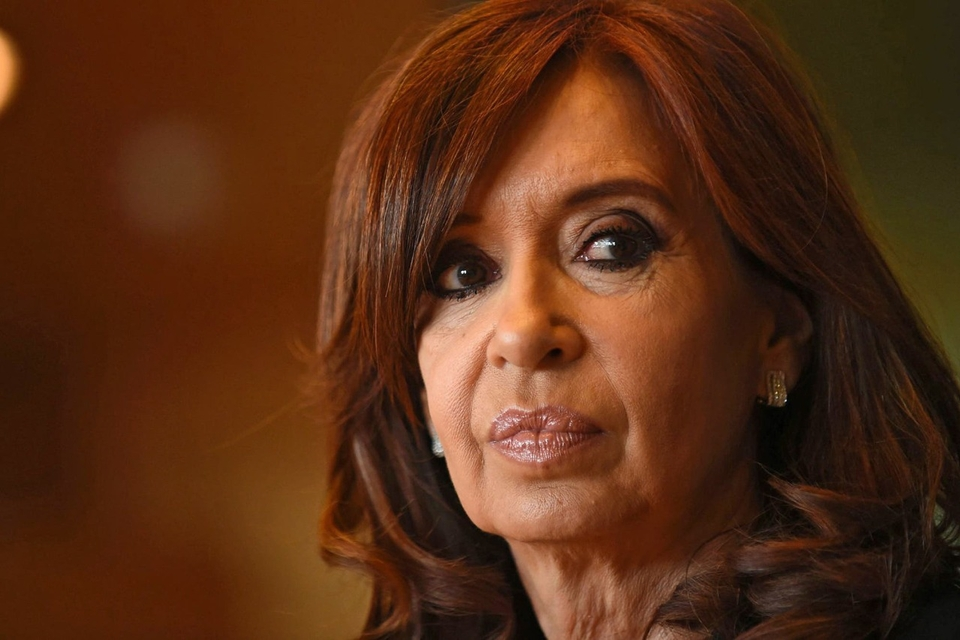

In [18]:
urlImg = obtenerImagen(imagenes)
print(urlImg)
img_req = requests.get(urlImg)
#print(img_req.content)

from IPython.display import Image #me permitira vizualizar la imagen
print(img_req.text)
Image(img_req.content)

